In [19]:
pip install biopython


Note: you may need to restart the kernel to use updated packages.


In [20]:
from os import path
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

<h1>Reading the .fasta files and saving each sequences as individual fasta files</h1>

<h3>For Delta</h3>

In [48]:
# Open the FASTA file and read the sequences
filename = "delta.fasta"
with open(filename) as file:
    sequences = SeqIO.parse(file, "fasta")

    file_number = 0

    # Loop through the sequences and print the ID and sequence
    for sequence in sequences:
        file_number += 1
        seq = sequence.seq.upper()
        keep_letters = "ACGT"
        filtered_letters = filter(lambda c: c in keep_letters, seq) 
        seq = "".join(filtered_letters)

        out_filename = "delta_" + str(file_number) + ".fasta"

        with open("SARS_CoV_2_Variants/Delta/" + out_filename, "w") as output_file:
          # Write the sequence to the file
          output_file.write(">"+sequence.id + "\n")
          output_file.write(seq + "\n")

<h3>For Omicron</h3>

In [49]:
filename = "omicron.fasta"
with open(filename) as file:
    sequences = SeqIO.parse(file, "fasta")

    file_number = 0

    # Loop through the sequences and print the ID and sequence
    for sequence in sequences:
        file_number += 1
        seq = sequence.seq.upper()
        keep_letters = "ACGT"
        filtered_letters = filter(lambda c: c in keep_letters, seq) 
        seq = "".join(filtered_letters)

        out_filename = "omicron_" + str(file_number) + ".fasta"

        with open("SARS_CoV_2_Variants/Omicron/" + out_filename, "w") as output_file:
          # Write the sequence to the fileoutput_file.write(seq + "\n")
          output_file.write(">"+sequence.id + "\n")
          output_file.write(seq + "\n")



# For removing the files



In [ ]:
from os import remove
file_number = 1
filename = "omicron_" + str(file_number) + ".fasta"
while(path.isfile("SARS_CoV_2_Variants/Omicron/" + filename)):
  remove("SARS_CoV_2_Variants/Omicron/" + filename)
  file_number+=1
  filename = "omicron_" + str(file_number) + ".fasta"
  print(filename)

In [ ]:
from os import remove
file_number = 1
filename = "delta_" + str(file_number) + ".fasta"
while(path.isfile("SARS_CoV_2_Variants/Delta/" + filename)):
  remove("SARS_CoV_2_Variants/Delta/" + filename)
  file_number+=1
  filename = "delta_" + str(file_number) + ".fasta"
  print(filename)

# to read individual files in omicron variant

In [50]:

list_sequences_omicron = []
file_number = 1
filename = "omicron_" + str(file_number) + ".fasta"
while(path.isfile("SARS_CoV_2_Variants/Omicron/" + filename)):
  with open("SARS_CoV_2_Variants/Omicron/" + filename) as file:
    sequences = SeqIO.parse(file, "fasta")
    for sequence in sequences:
      list_sequences_omicron.append(sequence.seq)
  file_number += 1
  filename = "omicron_" + str(file_number) + ".fasta"





# to read individual files in Delta Variant

In [51]:
list_sequences_delta = []
file_number = 1
filename = "delta_" + str(file_number) + ".fasta"
while(path.isfile("SARS_CoV_2_Variants/Delta/" + filename)):
  with open("SARS_CoV_2_Variants/Delta/" + filename) as file:
    sequences = SeqIO.parse(file, "fasta")
    for sequence in sequences:
      list_sequences_delta.append(sequence.seq)
  file_number += 1
  filename = "delta_" + str(file_number) + ".fasta"



# Calculate CGR of all the sequences

In [52]:
def cgr(seq, order, k):
  ln = len(seq)
  pw = 2**k
  out = [[0 for i in range(pw)] for j in range(pw)]
  x = 2**(k-1)
  y = 2**(k-1)
  for i in range(0,ln):
    x=x//2
    y=y//2
    if(seq[i] == order[2] or seq[i] == order[3]):
      x = x + (2**(k-1))
    if(seq[i] == order[0] or seq[i] == order[3]):
      y = y + (2**(k-1))
    if(i>=k-1):
      out[y][x] = out[y][x]+1
  return out

list_CGR_omicron = []
list_CGR_delta = []

for sequences in list_sequences_omicron:
  list_CGR_omicron.append(cgr(sequences,"ACGT", 7))



In [53]:
for sequences in list_sequences_delta:
  list_CGR_delta.append(cgr(sequences,"ACGT", 7))


# Calculating the distance matrix

In [54]:
def euclidean_distance(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt(np.sum((x - y)**2))

def cgr_distance_matrix(cgr_matrix):
    """Calculates the distance matrix for a CGR matrix."""
    n = len(cgr_matrix)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            dist = euclidean_distance(cgr_matrix[i], cgr_matrix[j])
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    return dist_matrix

dist_matrix_omicron = cgr_distance_matrix(list_CGR_omicron)


In [55]:
dist_matrix_delta = cgr_distance_matrix(list_CGR_delta)

# Dimentionality Reduction

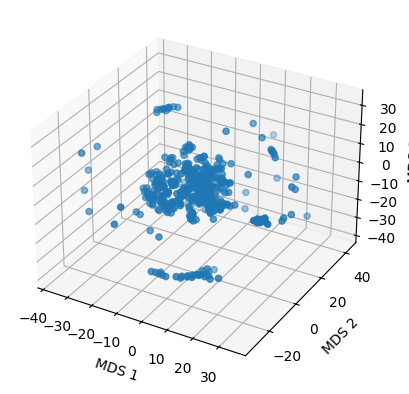

In [56]:
mds = MDS(n_components=3, dissimilarity='precomputed')

XO = mds.fit_transform(dist_matrix_omicron)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.scatter(XO[:,0], XO[:,1], XO[:,2])

# set axis labels
ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

plt.show()

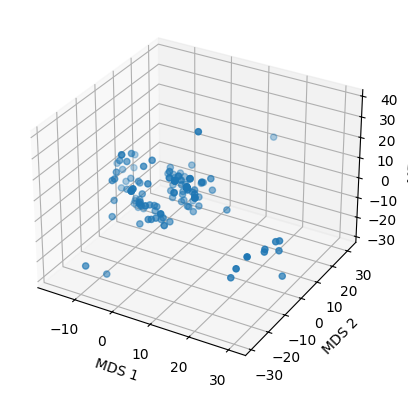

In [57]:
mds = MDS(n_components=3, dissimilarity='precomputed')

XD = mds.fit_transform(dist_matrix_delta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.scatter(XD[:,0], XD[:,1], XD[:,2])

# set axis labels
ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

plt.show()